## Import Packages/Library

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from warnings import simplefilter
from google.colab import files

## Download data harga saham BMRI

In [2]:
# Mute sklearn warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Download data harga saham
data = yf.download("BMRI.JK", start="2015-01-01", end="2024-12-31")
data = data[["Close", "High", "Low", "Open", "Volume"]].reset_index()
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)
data.columns.name = None

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,1693.061401,1696.971474,1681.331184,1685.241256,84546800
1,2015-01-05,1689.151123,1696.971267,1681.330979,1696.971267,33363200
2,2015-01-06,1677.421021,1693.061310,1669.600876,1681.331093,58600000
3,2015-01-07,1696.971436,1696.971436,1677.421073,1681.331146,50244400
4,2015-01-08,1712.611694,1716.521767,1700.881477,1704.791550,63649600


In [4]:
data.tail()

,Date,Close,High,Low,Open,Volume
2470,2024-12-20,5054.151367,5120.946319,5009.621399,5054.151367,148568600
2471,2024-12-23,5187.741211,5232.271178,5098.681276,5165.476227,82910100
2472,2024-12-24,5120.946289,5232.271208,5120.946289,5187.741241,41240900
2473,2024-12-27,5165.476562,5210.006533,5120.946592,5120.946592,46126800
2474,2024-12-30,5076.416504,5120.946473,5031.886535,5054.151519,96782100


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2475 non-null   datetime64[ns]
 1   Close   2475 non-null   float64       
 2   High    2475 non-null   float64       
 3   Low     2475 non-null   float64       
 4   Open    2475 non-null   float64       
 5   Volume  2475 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 116.1 KB


In [6]:
# Simpan sebagai CSV
data.to_csv("Data_Saham_BMRI.csv", index=False)
files.download("Data_Saham_BMRI.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

In [7]:
print(data.shape)

(2475, 6)


In [8]:
data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [9]:
print("Jumlah duplikasi:", data.duplicated().sum())

Jumlah duplikasi: 0


In [10]:
data.describe()

,Date,Close,High,Low,Open,Volume
count,2475,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,2019-12-16 08:34:54.545454592,2871.487156,2905.252993,2837.239901,2872.489893,9.361645e+07
min,2015-01-02 00:00:00,1197.880005,1237.676636,1138.184945,1162.062951,0.000000e+00
25%,2017-07-06 12:00:00,1927.817505,1954.366938,1906.622228,1934.523988,5.763020e+07
50%,2019-11-20 00:00:00,2470.121582,2500.676308,2436.756288,2473.761588,8.170420e+07
75%,2022-06-13 12:00:00,3224.489258,3269.833458,3199.297770,3224.489072,1.152236e+08
max,2024-12-30 00:00:00,6634.965332,6724.024958,6590.435059,6634.965025,7.702524e+08
std,NaN,1304.796013,1319.145774,1290.789725,1305.104779,5.743907e+07


In [11]:
data[data['Volume'] == 0]

,Date,Close,High,Low,Open,Volume
231,2015-12-09,1432.680176,1432.680176,1432.680176,1432.680176,0
292,2016-03-11,1607.785645,1607.785645,1607.785645,1607.785645,0
293,2016-03-14,1607.785645,1607.785645,1607.785645,1607.785645,0
312,2016-04-11,1609.237305,1609.237305,1609.237305,1609.237305,0
314,2016-04-13,1560.225098,1560.225098,1560.225098,1560.225098,0
...,...,...,...,...,...,...
1116,2019-06-04,2718.018799,2718.018799,2718.018799,2718.018799,0
1117,2019-06-05,2718.018799,2718.018799,2718.018799,2718.018799,0
1118,2019-06-06,2718.018799,2718.018799,2718.018799,2718.018799,0
1119,2019-06-07,2718.018799,2718.018799,2718.018799,2718.018799,0


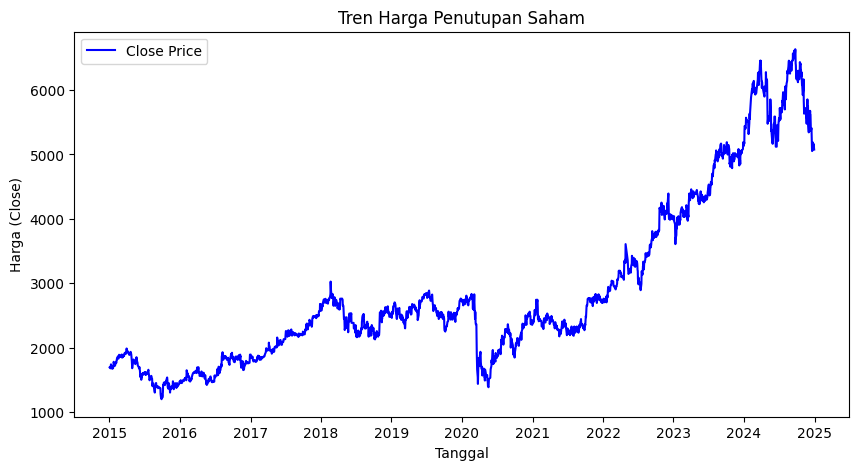

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Tren Harga Penutupan Saham')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Close)')
plt.legend()
plt.show()

## Data Preparation

In [13]:
# Menghapus data yang memiliki Volume 0
data = data[data['Volume'] != 0].reset_index(drop=True)

In [14]:
data.describe()

,Date,Close,High,Low,Open,Volume
count,2407,2407.000000,2407.000000,2407.000000,2407.000000,2.407000e+03
mean,2020-01-04 07:39:27.594515968,2886.981655,2921.701408,2851.766883,2888.012720,9.626120e+07
min,2015-01-02 00:00:00,1197.880005,1237.676636,1138.184945,1162.062951,5.985400e+06
25%,2017-07-11 12:00:00,1922.956299,1944.154946,1903.758153,1925.691291,5.998370e+07
50%,2020-01-10 00:00:00,2470.121582,2501.860776,2440.332143,2473.958983,8.303720e+07
75%,2022-07-06 12:00:00,3305.101318,3345.407442,3249.680366,3305.101336,1.164716e+08
max,2024-12-30 00:00:00,6634.965332,6724.024958,6590.435059,6634.965025,7.702524e+08
std,NaN,1318.306910,1332.494169,1304.457263,1318.609018,5.601606e+07


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2407 non-null   datetime64[ns]
 1   Close   2407 non-null   float64       
 2   High    2407 non-null   float64       
 3   Low     2407 non-null   float64       
 4   Open    2407 non-null   float64       
 5   Volume  2407 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.0 KB


In [16]:
# Simpan sebagai CSV
data.to_csv("Data_Saham_BMRI_Clean.csv", index=False)
files.download("Data_Saham_BMRI_Clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>